Task 1: The first task involves loading the CrisisMMD dataset and conducting exploratory data analysis (EDA)
to understand its structure. The focus will be on the task_informative_text_img files (train, dev, and test) located
in the crisismmd_datasplit_all folders. This task will include creating a bar plot to visualize the distribution of
different labels in the dataset. Additionally, we will investigate the relationship between label_text and
label_image by counting how many rows have identical and differing values.

In [1]:
import pandas as pd
import os
output_dir = os.getcwd()

crisismmd_datasplit_all=os.path.join(output_dir, 'CrisisMMD_v2.0/crisismmd_datasplit_all')
info_df_train = pd.read_csv(os.path.join(crisismmd_datasplit_all, 'task_informative_text_img_train.tsv'), sep='\t')
info_df_dev = pd.read_csv(os.path.join(crisismmd_datasplit_all, 'task_informative_text_img_dev.tsv'), sep='\t')
info_df_test = pd.read_csv(os.path.join(crisismmd_datasplit_all, 'task_informative_text_img_test.tsv'), sep='\t')

info_df = pd.concat([info_df_train, info_df_dev, info_df_test], axis=0)

In [2]:
print(info_df_train['label_text'].value_counts())
print(info_df_train['label_image'].value_counts())

label_text
informative        9638
not_informative    3970
Name: count, dtype: int64
label_image
informative        7059
not_informative    6549
Name: count, dtype: int64



Training Set Distribution:
Text Labels:
informative: 9638 (70.83%)
not_informative: 3970 (29.17%)

Image Labels:
informative: 7059 (51.87%)
not_informative: 6549 (48.13%)

Combined Labels:
informative: 8341 (61.29%)
not_informative: 5267 (38.71%)

Development Set Distribution:
Text Labels:
informative: 1612 (72.06%)
not_informative: 625 (27.94%)

Image Labels:
informative: 1164 (52.03%)
not_informative: 1073 (47.97%)

Combined Labels:
informative: 1407 (62.9%)
not_informative: 830 (37.1%)

Test Set Distribution:
Text Labels:
informative: 1612 (72.06%)
not_informative: 625 (27.94%)

Image Labels:
informative: 1151 (51.45%)
not_informative: 1086 (48.55%)

Combined Labels:
informative: 1373 (61.38%)
not_informative: 864 (38.62%)


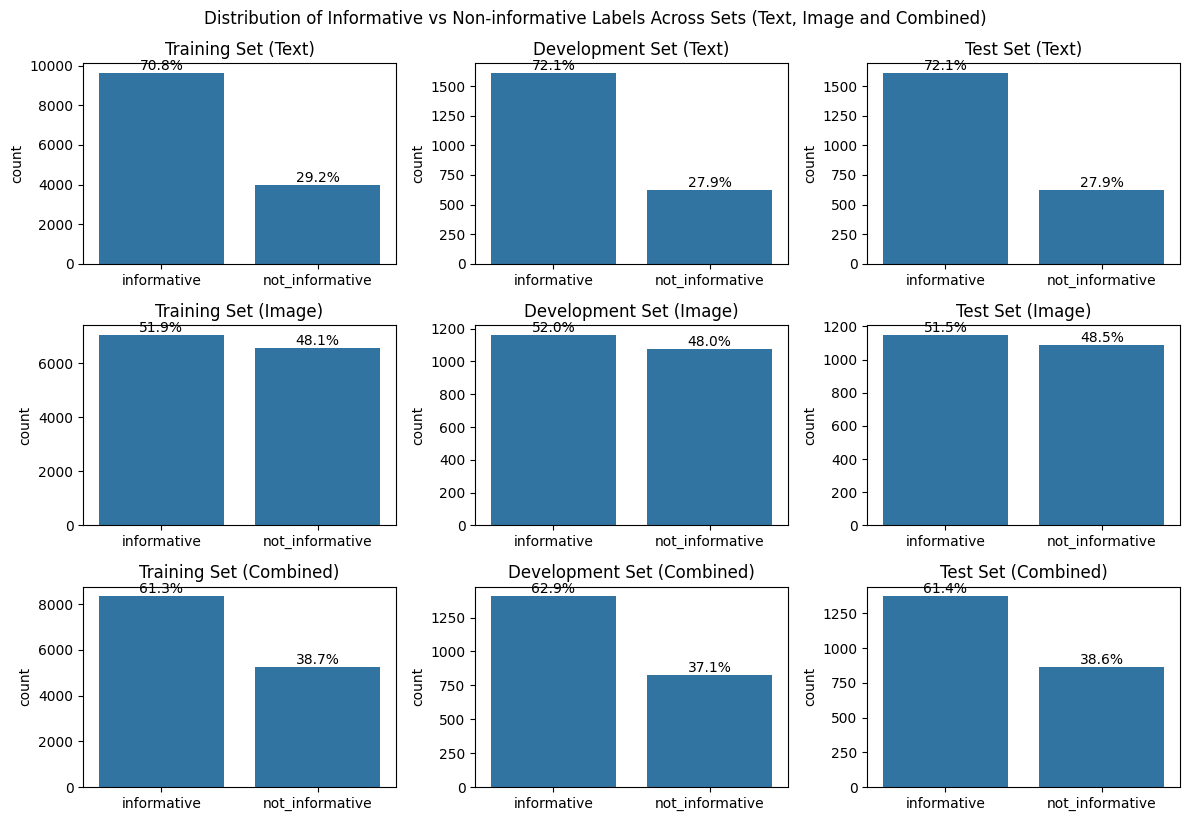

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(12, 8))

label_order = ['informative', 'not_informative']

def add_percentages(ax, data, label_col):
    total = len(data)
    for p in ax.patches:
        percentage = (p.get_height() / total) * 100
        ax.text(p.get_x() + p.get_width()/2., p.get_height(),
                f'{percentage:.1f}%',
                ha='center', va='bottom')

sns.countplot(x='label_text', data=info_df_train, ax=ax1, order=label_order)
add_percentages(ax1, info_df_train, 'label_text')
ax1.set_title('Training Set (Text)')
ax1.set_xlabel('')

sns.countplot(x='label_text', data=info_df_dev, ax=ax2, order=label_order)
add_percentages(ax2, info_df_dev, 'label_text')
ax2.set_title('Development Set (Text)')
ax2.set_xlabel('')

sns.countplot(x='label_text', data=info_df_test, ax=ax3, order=label_order)
add_percentages(ax3, info_df_test, 'label_text')
ax3.set_title('Test Set (Text)')
ax3.set_xlabel('')

sns.countplot(x='label_image', data=info_df_train, ax=ax4, order=label_order)
add_percentages(ax4, info_df_train, 'label_image')
ax4.set_title('Training Set (Image)')
ax4.set_xlabel('')

sns.countplot(x='label_image', data=info_df_dev, ax=ax5, order=label_order)
add_percentages(ax5, info_df_dev, 'label_image')
ax5.set_title('Development Set (Image)')
ax5.set_xlabel('')

sns.countplot(x='label_image', data=info_df_test, ax=ax6, order=label_order)
add_percentages(ax6, info_df_test, 'label_image')
ax6.set_title('Test Set (Image)')
ax6.set_xlabel('')

sns.countplot(x='label', data=info_df_train, ax=ax7, order=label_order)
add_percentages(ax7, info_df_train, 'label')
ax7.set_title('Training Set (Combined)')
ax7.set_xlabel('')

sns.countplot(x='label', data=info_df_dev, ax=ax8, order=label_order)
add_percentages(ax8, info_df_dev, 'label')
ax8.set_title('Development Set (Combined)')
ax8.set_xlabel('')

sns.countplot(x='label', data=info_df_test, ax=ax9, order=label_order)
add_percentages(ax9, info_df_test, 'label')
ax9.set_title('Test Set (Combined)')
ax9.set_xlabel('')

plt.tight_layout()

fig.suptitle('Distribution of Informative vs Non-informative Labels Across Sets (Text, Image and Combined)', y=1.02)

for dataset_name, dataset in [('Training', info_df_train), 
                            ('Development', info_df_dev), 
                            ('Test', info_df_test)]:
    print(f"\n{dataset_name} Set Distribution:")
    print("Text Labels:")
    text_counts = dataset['label_text'].value_counts()
    text_percentages = dataset['label_text'].value_counts(normalize=True).multiply(100).round(2)
    for label in label_order:
        print(f"{label}: {text_counts[label]} ({text_percentages[label]}%)")
    
    print("\nImage Labels:")
    img_counts = dataset['label_image'].value_counts()
    img_percentages = dataset['label_image'].value_counts(normalize=True).multiply(100).round(2)
    for label in label_order:
        print(f"{label}: {img_counts[label]} ({img_percentages[label]}%)")
        
    print("\nCombined Labels:")
    combined_counts = dataset['label'].value_counts()
    combined_percentages = dataset['label'].value_counts(normalize=True).multiply(100).round(2)
    for label in label_order:
        print(f"{label}: {combined_counts[label]} ({combined_percentages[label]}%)")

plt.show()

In [4]:
# Count how many rows have identical values in label_text and label_image
same_labels = (info_df_train['label_text'] == info_df_train['label_image']).sum()
different_labels = (info_df_train['label_text'] != info_df_train['label_image']).sum()

print(f"Rows with identical labels: {same_labels}")
print(f"Rows with differing labels: {different_labels}")


Rows with identical labels: 9601
Rows with differing labels: 4007


[('to', 3576), ('in', 3096), ('the', 2562), ('of', 2526), ('Hurricane', 2466), ('RT', 2115), ('for', 2023), ('Puerto', 1790), ('and', 1710), ('Harvey', 1598), ('Irma', 1587), ('a', 1510), ('Rico', 1189), ('on', 1154), ('from', 1136), ('is', 1008), ('by', 999), ('after', 936), ('-', 827), ('Maria', 816), ('with', 750), ('at', 742), ('California', 722), ('&amp;', 606), ('#Irma', 591), ('earthquake', 586), ('Mexico', 573), ('The', 542), ('help', 503), ('you', 481)]


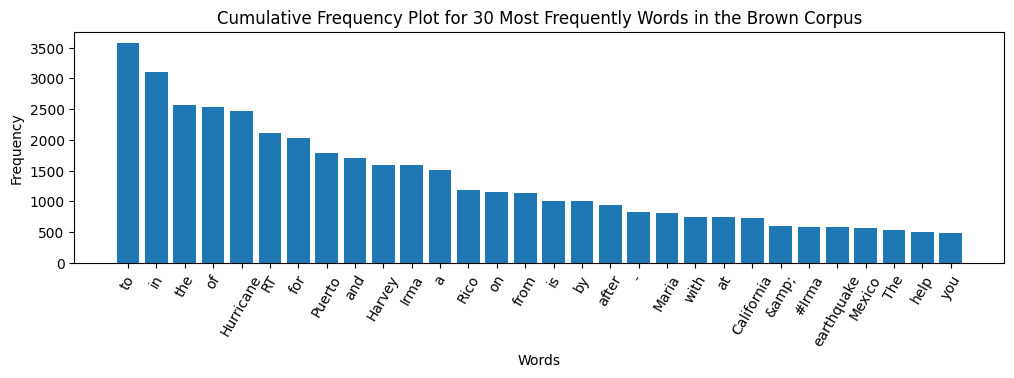

In [5]:
import nltk
from nltk import FreqDist
#info_df_train
all_words = ' '.join(info_df_train['tweet_text']).split()
fdist1 = FreqDist(all_words)


most_common = fdist1.most_common(30)
#fdist1.plot(30, cumulative=True)
print(most_common)
common_word, common_freq = zip(*most_common)
plt.figure(figsize=(12, 3))
plt.bar(common_word, common_freq)
plt.title('Cumulative Frequency Plot for 30 Most Frequently Words in the Brown Corpus')
plt.xlabel('Words')
plt.xticks(rotation=60)
plt.ylabel('Frequency')
plt.show()


In [6]:
#import numpy as np
#word_freq = sorted(fdist1.values(), reverse=True)
#ranks = np.arange(1, len(word_freq) + 1)
#
## Plot frequency vs. rank on a log-log scale
#plt.figure(figsize=(10, 6))
#plt.loglog(ranks, word_freq)
#plt.title("Zipf's Law: Frequency vs Rank of Words")
#plt.xlabel("Rank")
#plt.ylabel("Frequency")
#plt.grid(True)
#plt.show()


Top 10 words and their frequencies:
1. to: 3576
2. in: 3096
3. the: 2562
4. of: 2526
5. Hurricane: 2466
6. RT: 2115
7. for: 2023
8. Puerto: 1790
9. and: 1710
10. Harvey: 1598

Top 10 least frequent words:
52056. @FamilyTreeDNA: 1
52057. https://t.co/PjPwaBBOoq: 1
52058. https://t.co/WRrLVzMVyz: 1
52059. Ursula: 1
52060. Witch.: 1
52061. https://t.co/VAOI5yCSb8: 1
52062. PH: 1
52063. Embassy,: 1
52064. https://t.co/uchLzo8Zs8: 1
52065. https://t.co/Y8sRCGLNTP: 1


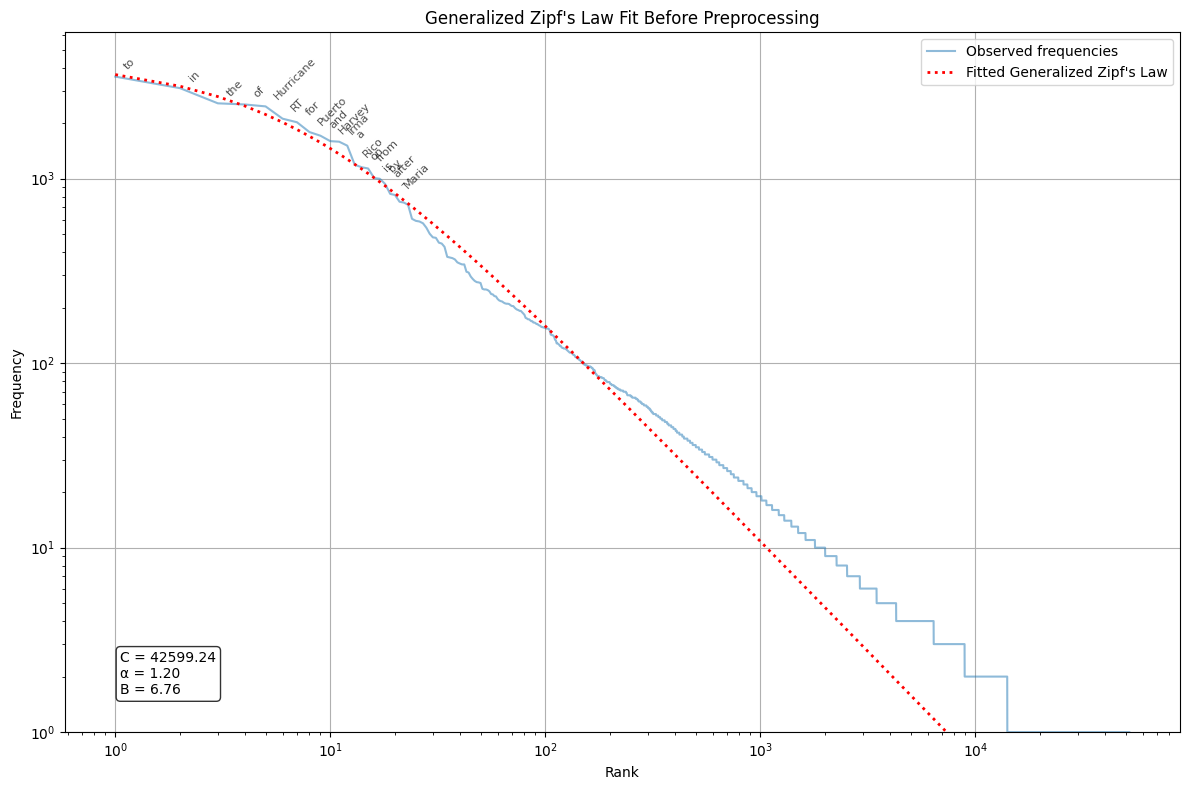

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the generalized Zipf's law function
def generalized_zipf(rank, C, alpha, B):
    """
    Generalized Zipf's Law function: f(r) = C / (r + B)^alpha
    Parameters:
    - rank: word rank
    - C: normalization constant
    - alpha: power law exponent
    - B: shift parameter
    """
    return C / (rank + B)**alpha

all_words = ' '.join(info_df_train['tweet_text']).split()
fdist1 = FreqDist(all_words)

word_freq_pairs = sorted(fdist1.items(), key=lambda x: x[1], reverse=True)
words, frequencies = zip(*word_freq_pairs)  

word_freq = np.array(frequencies)
ranks = np.arange(1, len(word_freq) + 1)

try:
    p0 = [word_freq[0], 1.0, 1.0]

    popt, pcov = curve_fit(generalized_zipf, ranks, word_freq, 
                          p0=p0, maxfev=10000)
    
    C_fit, alpha_fit, B_fit = popt
    
    fitted_curve = generalized_zipf(ranks, C_fit, alpha_fit, B_fit)
    

    plt.figure(figsize=(12, 8))
    
    plt.loglog(ranks, word_freq, label='Observed frequencies', alpha=0.5)
    
    plt.loglog(ranks, fitted_curve, 'r:', label='Fitted Generalized Zipf\'s Law', linewidth=2)
    
    for i in range(20):
        plt.annotate(words[i], 
                    (ranks[i], word_freq[i]),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=8,
                    alpha=0.7,
                    rotation=45)

    plt.title('Generalized Zipf\'s Law Fit Before Preprocessing')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.legend()
    plt.ylim(bottom=1)
    param_text = f'C = {C_fit:.2f}\nα = {alpha_fit:.2f}\nB = {B_fit:.2f}'
    plt.text(0.05, 0.05, param_text, transform=plt.gca().transAxes, 
             verticalalignment='bottom', horizontalalignment='left',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    

    print("\nTop 10 words and their frequencies:")
    for i in range(10):
        print(f"{i+1}. {words[i]}: {frequencies[i]}")
    print("\nTop 10 least frequent words:")
    for i in range(-10, 0):
        print(f"{len(words)+i+1}. {words[i]}: {frequencies[i]}")
    plt.tight_layout()
    plt.show()

except RuntimeError as e:
    print("Error in fitting:", e)
    print("Try adjusting initial parameters or increasing maxfev")

Task 2: In the second task, the focus shifts to cleaning the textual data in the tweet_text column. Standard text
preprocessing techniques will be applied, including the removal of stopwords, irrelevant characters, and
elements such as hashtags, user mentions, and URLs. Lemmatization will also be performed to normalize the
words.

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # remove punctuation and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # tokenize, remove stopwords, and lemmatize
    words = text.split()
    cleaned_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    
    return ' '.join(cleaned_words)
cleaned_words = info_df_train['tweet_text'].apply(clean_text)

print(cleaned_words.head())


0    rt pls share weâre capturing wildfire response...
1    rt pls share weâre capturing wildfire response...
2             rt california wildfire destroy structure
3             rt california wildfire destroy structure
4             rt california wildfire destroy structure
Name: tweet_text, dtype: object


[('hurricane', 3035), ('irma', 2329), ('rt', 2124), ('harvey', 2073), ('puerto', 1859), ('rico', 1789), ('maria', 1100), ('earthquake', 1035), ('california', 870), ('help', 795), ('mexico', 760), ('relief', 647), ('wildfire', 636), ('amp', 616), ('victim', 571), ('mora', 424), ('u', 423), ('new', 403), ('storm', 383), ('fire', 356), ('florida', 346), ('damage', 321), ('home', 317), ('day', 309), ('people', 308), ('via', 301), ('hit', 300), ('still', 292), ('today', 289), ('back', 289)]


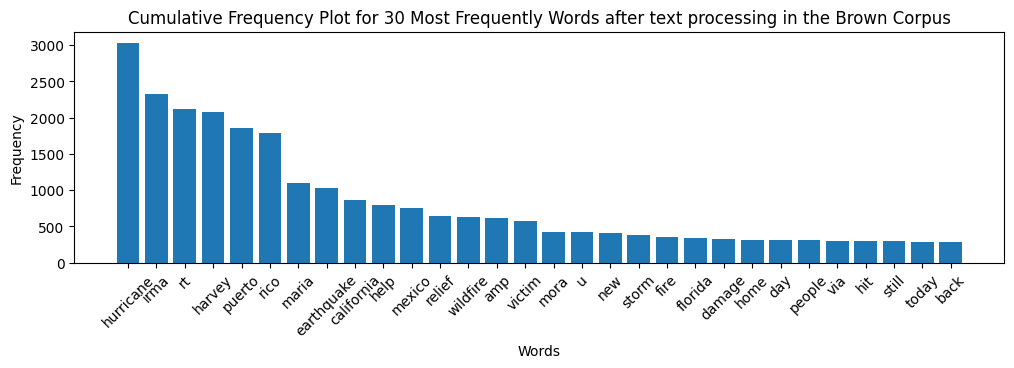

In [9]:
cleaned_words = ' '.join(cleaned_words).split()
cleaned_fdist1 = FreqDist(cleaned_words)


cleaned_most_common = cleaned_fdist1.most_common(30)
#fdist1.plot(30, cumulative=True)
print(cleaned_most_common)
cleaned_common_word, cleaned_common_freq = zip(*cleaned_most_common)
plt.figure(figsize=(12, 3))
plt.bar(cleaned_common_word, cleaned_common_freq)
plt.title('Cumulative Frequency Plot for 30 Most Frequently Words after text processing in the Brown Corpus')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()



Top 10 words and their frequencies:
1. hurricane: 3035
2. irma: 2329
3. rt: 2124
4. harvey: 2073
5. puerto: 1859
6. rico: 1789
7. maria: 1100
8. earthquake: 1035
9. california: 870
10. help: 795

Top 10 least frequent words:
13268. plasma: 1
13269. prp: 1
13270. pig: 1
13271. selfaccount: 1
13272. plotted: 1
13273. dependent: 1
13274. ecosystem: 1
13275. atm: 1
13276. ursula: 1
13277. witch: 1


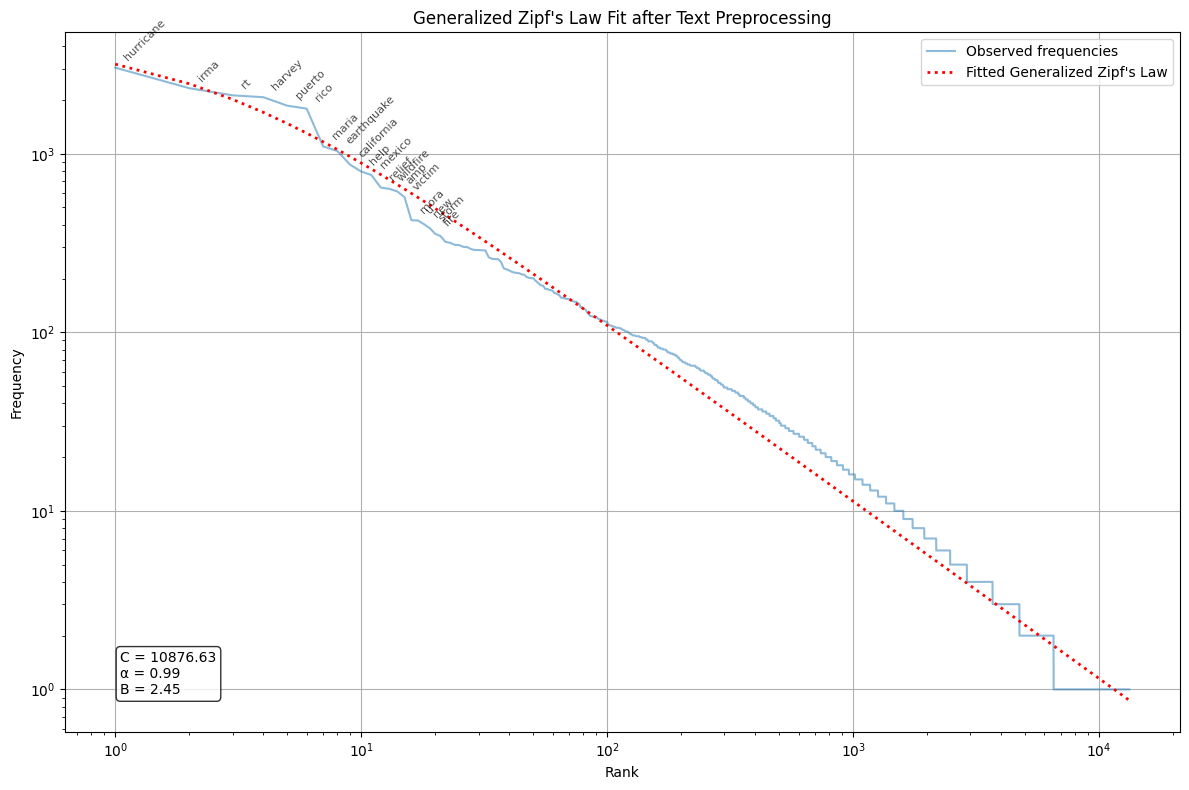

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the generalized Zipf's law function
def generalized_zipf(rank, C, alpha, B):
    """
    Generalized Zipf's Law function: f(r) = C / (r + B)^alpha
    Parameters:
    - rank: word rank
    - C: normalization constant
    - alpha: power law exponent
    - B: shift parameter
    """
    return C / (rank + B)**alpha


word_freq_pairs = sorted(cleaned_fdist1.items(), key=lambda x: x[1], reverse=True)
words, frequencies = zip(*word_freq_pairs) 


cleaned_word_freq = np.array(frequencies)
cleaned_ranks = np.arange(1, len(cleaned_word_freq) + 1)

try:
    p0 = [cleaned_word_freq[0], 1.0, 1.0]
    
    popt, pcov = curve_fit(generalized_zipf, cleaned_ranks, cleaned_word_freq, 
                          p0=p0, maxfev=10000)
    
    C_fit, alpha_fit, B_fit = popt
    
    fitted_curve = generalized_zipf(cleaned_ranks, C_fit, alpha_fit, B_fit)

    plt.figure(figsize=(12, 8))
    
    plt.loglog(cleaned_ranks, cleaned_word_freq, label='Observed frequencies', alpha=0.5)
    
    plt.loglog(cleaned_ranks, fitted_curve, 'r:', label='Fitted Generalized Zipf\'s Law', linewidth=2)
    
    for i in range(20):
        plt.annotate(words[i], 
                    (cleaned_ranks[i], cleaned_word_freq[i]),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=8,
                    alpha=0.7,
                    rotation=45)
    
    plt.title('Generalized Zipf\'s Law Fit after Text Preprocessing')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.legend()
    
    param_text = f'C = {C_fit:.2f}\nα = {alpha_fit:.2f}\nB = {B_fit:.2f}'
    plt.text(0.05, 0.05, param_text, transform=plt.gca().transAxes, 
             verticalalignment='bottom', horizontalalignment='left',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    print("\nTop 10 words and their frequencies:")
    for i in range(10):
        print(f"{i+1}. {words[i]}: {frequencies[i]}")
    print("\nTop 10 least frequent words:")
    for i in range(-10, 0):
        print(f"{len(words)+i+1}. {words[i]}: {frequencies[i]}")
    plt.tight_layout()
    plt.show()

except RuntimeError as e:
    print("Error in fitting:", e)
    print("Try adjusting initial parameters or increasing maxfev")

Task 3: The third task focuses on performing binary classification to identify whether tweets are informative or
non-informative using traditional machine learning models. We will first evaluate whether the dataset is
balanced by analyzing the distribution of label_text. Next, use GloVe, TF-IDF, and Bag of Words (BoW) word
embeddings will be generated for the text data in the train, dev, and test datasets. Traditional ML classifiers such
as Logistic Regression, Support Vector Classifier (SVC), XGBoost, and Random Forest will be trained using the
training dataset (on all three-word embeddings separately). The dev dataset will be used to validate the models,
and their performance will be measured using Precision, Recall, F1-score, and visualize confusion matrix (best
model for each word embedding technique). The best-performing model will then be selected for predicting the
classes in the test dataset.

label
informative        8341
not_informative    5267
Name: count, dtype: int64


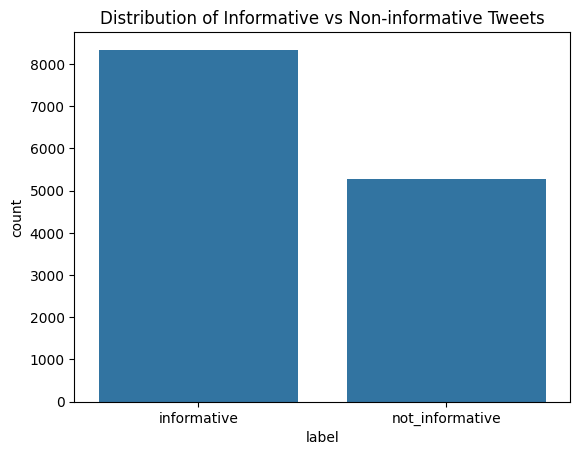

In [12]:
# Check the distribution of informative vs. non-informative labels
print(info_df_train['label'].value_counts())

# Visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=info_df_train)
plt.title('Distribution of Informative vs Non-informative Tweets')
plt.show()


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_features=5000) 

info_df_train = pd.read_csv(os.path.join(crisismmd_datasplit_all, 'task_informative_text_img_train.tsv'), sep='\t')

info_df_dev = pd.read_csv(os.path.join(crisismmd_datasplit_all, 'task_informative_text_img_dev.tsv'), sep='\t')

info_df_test = pd.read_csv(os.path.join(crisismmd_datasplit_all, 'task_informative_text_img_test.tsv'), sep='\t')

X_train_bow = bow_vectorizer.fit_transform(info_df_train['tweet_text'].apply(clean_text))
X_dev_bow = bow_vectorizer.transform(info_df_dev['tweet_text'].apply(clean_text))
X_test_bow = bow_vectorizer.transform(info_df_test['tweet_text'].apply(clean_text))


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(info_df_train['tweet_text'].apply(clean_text))
X_dev_tfidf = tfidf_vectorizer.transform(info_df_dev['tweet_text'].apply(clean_text))
X_test_tfidf = tfidf_vectorizer.transform(info_df_test['tweet_text'].apply(clean_text))



In [ ]:
import numpy as np

def get_glove_embeddings(text, embedding_dim=100):
    words = text.split()
    embeddings = [glove_embeddings.get(word, np.zeros(embedding_dim)) for word in words]
    
    if len(embeddings) == 0:
        return np.zeros(embedding_dim)
    
    return np.mean(embeddings, axis=0)

glove_embeddings = {}
with open('glove.6B.100d.txt', 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector


X_train_glove = np.array([get_glove_embeddings(text) for text in info_df_train['tweet_text'].apply(clean_text)])
X_dev_glove = np.array([get_glove_embeddings(text) for text in info_df_dev['tweet_text'].apply(clean_text)])
X_test_glove = np.array([get_glove_embeddings(text) for text in info_df_test['tweet_text'].apply(clean_text)])


In [16]:
y_train = info_df_train['label_text']
y_dev = info_df_dev['label_text']
y_test = info_df_test['label_text']

Evaluating models on BoW embeddings:
Training Logistic Regression...

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.68      0.53      0.60       625
           1       0.83      0.90      0.87      1612

    accuracy                           0.80      2237
   macro avg       0.76      0.72      0.73      2237
weighted avg       0.79      0.80      0.79      2237



/home/xubuntu_0913/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


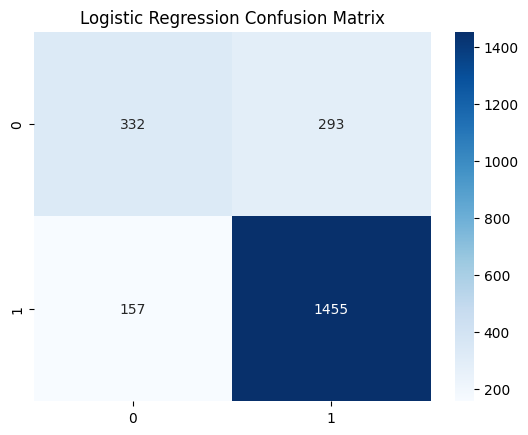

Training SVC...

SVC Performance:
              precision    recall  f1-score   support

           0       0.71      0.50      0.59       625
           1       0.83      0.92      0.87      1612

    accuracy                           0.80      2237
   macro avg       0.77      0.71      0.73      2237
weighted avg       0.79      0.80      0.79      2237



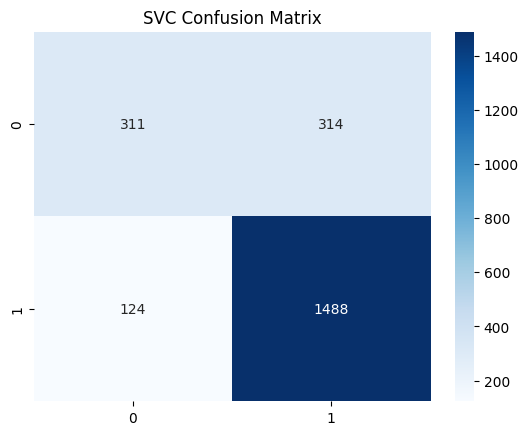

Training Random Forest...

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.62      0.55      0.58       625
           1       0.83      0.87      0.85      1612

    accuracy                           0.78      2237
   macro avg       0.73      0.71      0.72      2237
weighted avg       0.77      0.78      0.78      2237



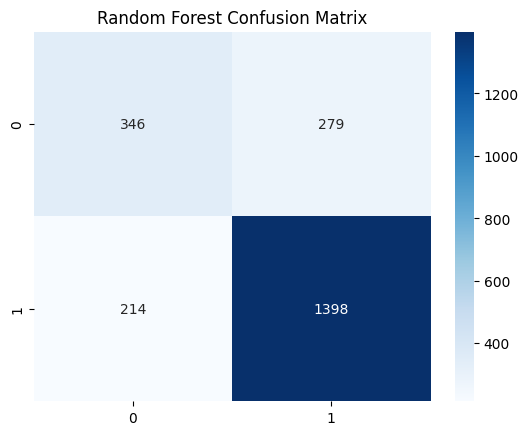

Training XGBoost...

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.72      0.37      0.49       625
           1       0.79      0.95      0.86      1612

    accuracy                           0.78      2237
   macro avg       0.76      0.66      0.68      2237
weighted avg       0.77      0.78      0.76      2237



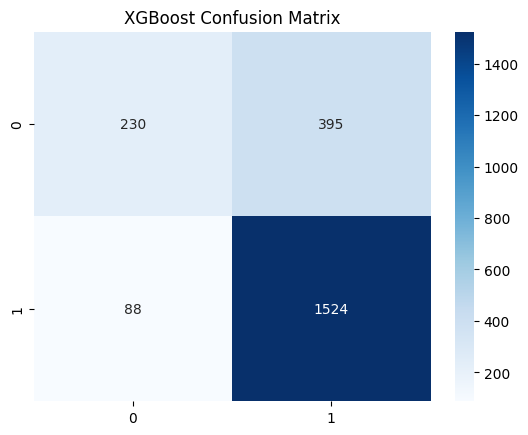

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

def train_and_evaluate(X_train, X_dev, y_train, y_dev):
    for model_name, model in models.items():
        print(f"Training {model_name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_dev)
        print(f"\n{model_name} Performance:")
        print(classification_report(y_dev, y_pred))
        cm = confusion_matrix(y_dev, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'{model_name} Confusion Matrix')
        plt.show()

y_train = info_df_train['label_text']
y_dev = info_df_dev['label_text']
label_mapping = {'informative': 1, 'not_informative': 0}

y_train = y_train.map(label_mapping)
y_dev = y_dev.map(label_mapping)

#print(y_train.head())
#print(y_dev.head())

print("Evaluating models on BoW embeddings:")
train_and_evaluate(X_train_bow, X_dev_bow, y_train, y_dev)


Training Logistic Regression...

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57       625
           1       0.82      0.91      0.86      1612

    accuracy                           0.79      2237
   macro avg       0.75      0.70      0.72      2237
weighted avg       0.78      0.79      0.78      2237



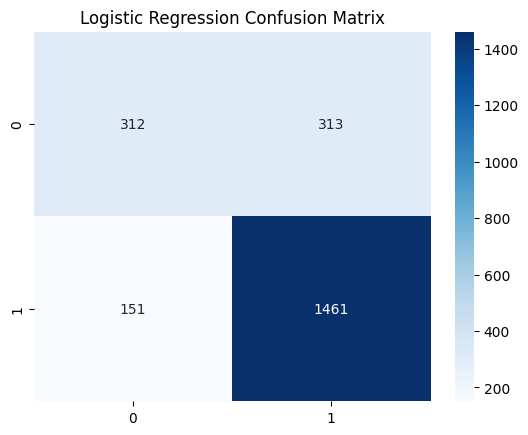

Training SVC...

SVC Performance:
              precision    recall  f1-score   support

           0       0.71      0.50      0.59       625
           1       0.83      0.92      0.87      1612

    accuracy                           0.80      2237
   macro avg       0.77      0.71      0.73      2237
weighted avg       0.79      0.80      0.79      2237



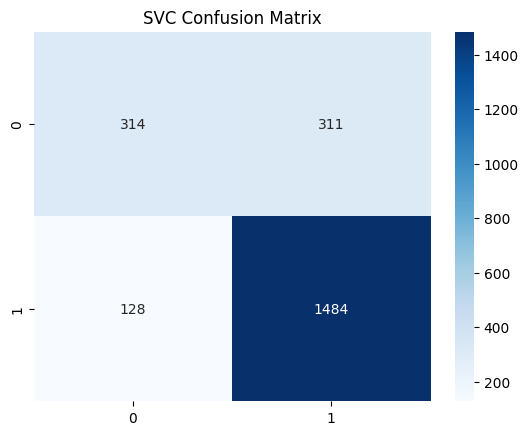

Training Random Forest...

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.72      0.44      0.55       625
           1       0.81      0.93      0.87      1612

    accuracy                           0.80      2237
   macro avg       0.77      0.69      0.71      2237
weighted avg       0.79      0.80      0.78      2237



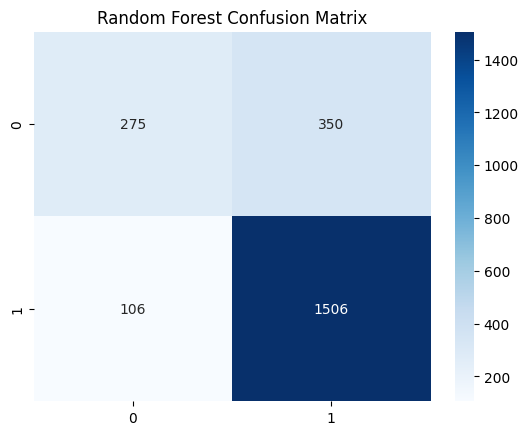

Training XGBoost...

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.67      0.51      0.58       625
           1       0.83      0.90      0.86      1612

    accuracy                           0.79      2237
   macro avg       0.75      0.71      0.72      2237
weighted avg       0.78      0.79      0.78      2237



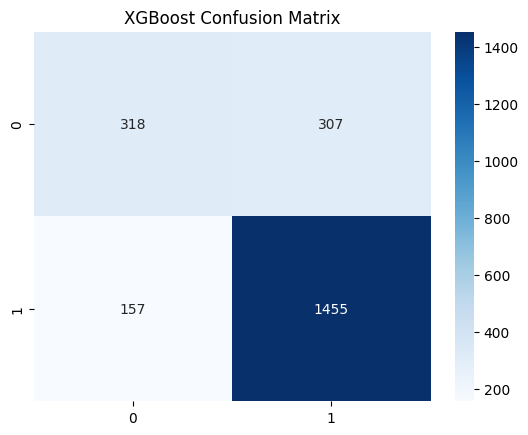

In [18]:
train_and_evaluate(X_train_glove, X_dev_glove, y_train, y_dev)


Training Logistic Regression...

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.72      0.44      0.55       625
           1       0.81      0.93      0.87      1612

    accuracy                           0.80      2237
   macro avg       0.77      0.69      0.71      2237
weighted avg       0.79      0.80      0.78      2237



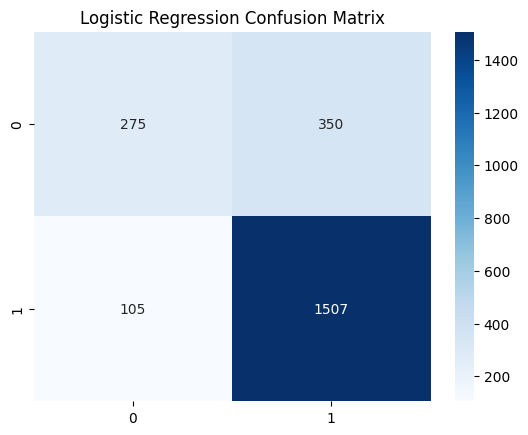

Training SVC...

SVC Performance:
              precision    recall  f1-score   support

           0       0.74      0.44      0.55       625
           1       0.81      0.94      0.87      1612

    accuracy                           0.80      2237
   macro avg       0.77      0.69      0.71      2237
weighted avg       0.79      0.80      0.78      2237



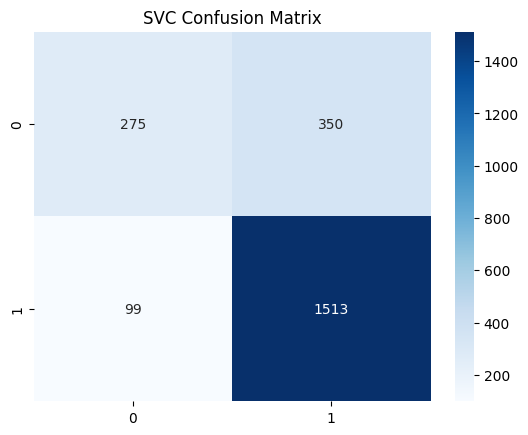

Training Random Forest...

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.70      0.52      0.59       625
           1       0.83      0.91      0.87      1612

    accuracy                           0.80      2237
   macro avg       0.76      0.71      0.73      2237
weighted avg       0.79      0.80      0.79      2237



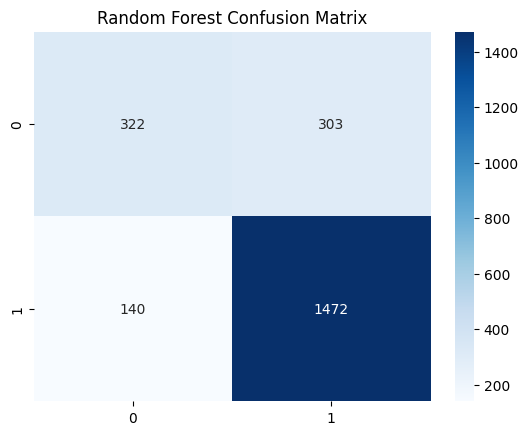

Training XGBoost...

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.71      0.40      0.51       625
           1       0.80      0.94      0.86      1612

    accuracy                           0.79      2237
   macro avg       0.75      0.67      0.69      2237
weighted avg       0.77      0.79      0.76      2237



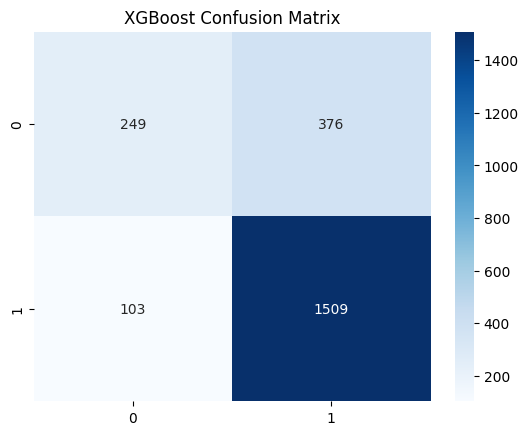

In [19]:
train_and_evaluate(X_train_tfidf, X_dev_tfidf, y_train, y_dev)